In [14]:
import hopsy
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# create 3D rectangle
A = np.array(
    [
        [1.0, 0.0, 0.0],
        [0.0, 1.0, 0.0],
        [0.0, 0.0, 1.0],
        [-1.0, 0.0, 0.0],
        [0.0, -1.0, 0.0],
        [0.0, 0.0, -1.0],
    ]
)
b = np.array([1.0, 2.0, 3.0, 1.0, 2.0, 3.0])


rectangle = hopsy.Problem(A=A, b=b)

# First sample without equality constraints

In [35]:
mc = hopsy.MarkovChain(rectangle, starting_point=np.zeros(3))
rng = hopsy.RandomNumberGenerator(42)
_, samples = hopsy.sample(mc, rng, n_samples=20000, thinning=10)

In [36]:
print(samples)

[[[ 0.26653144 -1.11889648 -0.17080836]
  [-0.9418255  -0.33957506  1.98207648]
  [ 0.80278535  0.47749555  1.12280485]
  ...
  [-0.8399288   0.11007866  2.90024278]
  [ 0.88967784 -0.61249626  2.00471622]
  [-0.87693032  1.54067729  1.94710096]]]


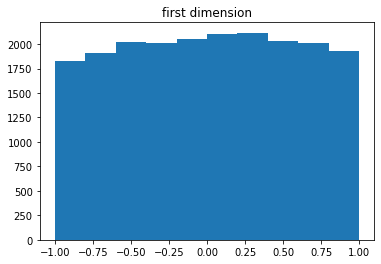

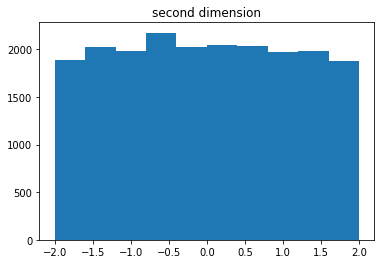

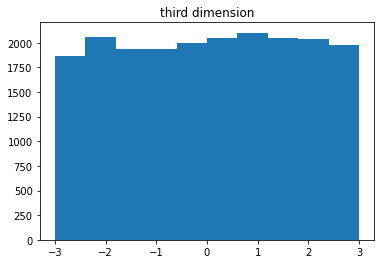

In [34]:
plt.figure()
plt.title("first dimension")
plt.hist(samples[0, :, 0])
plt.figure()
plt.title("second dimension")
plt.hist(samples[0, :, 1])
plt.figure()
plt.title("third dimension")
plt.hist(samples[0, :, 2])
plt.show()

# Now constraint rectangle to 2D by fixing third dimension at 2.5

In [38]:
A_eq = np.array(
    [
        [0.0, 0.0, 1.0]
    ]
)
b_eq = np.array([2.5])

constrained_rectangle = hopsy.add_equality_constraints(rectangle, A_eq=A_eq, b_eq=b_eq)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-30


In [39]:
mc = hopsy.MarkovChain(constrained_rectangle, starting_point=np.zeros(3))
rng = hopsy.RandomNumberGenerator(43)
_, constrained_samples = hopsy.sample(mc, rng, n_samples=20000, thinning=10)

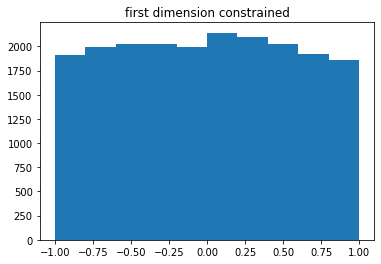

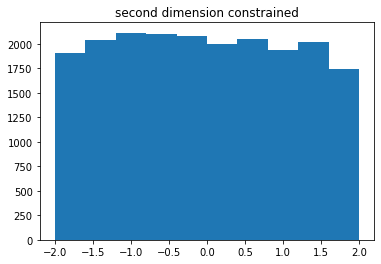

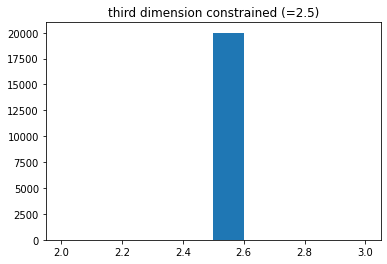

In [41]:
plt.figure()
plt.title("first dimension constrained")
plt.hist(constrained_samples[0, :, 0])
plt.figure()
plt.title("second dimension constrained")
plt.hist(constrained_samples[0, :, 1])
plt.figure()
plt.title("third dimension constrained (=2.5)")
plt.hist(constrained_samples[0, :, 2])
plt.show()